In [17]:
import cv2 as cv
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
import time

(320, 640, 3)

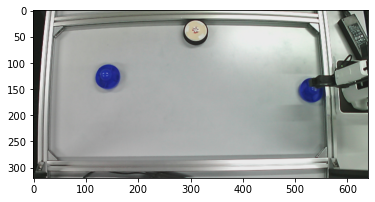

In [28]:
# frame=cv.imread('basetest1.jpg')
frame=cv.imread('image.png')
plt.imshow(frame)
frame.shape

[[ 1.54736281e+00  5.73097337e-02 -4.75670790e+01]
 [ 1.51381316e-02  1.57436569e+00 -3.19414577e+01]
 [ 4.01532767e-06  2.14614070e-04  1.00000000e+00]]


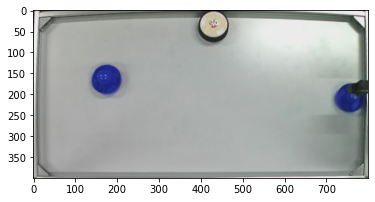

In [59]:
# 参考　https://qiita.com/code0327/items/c6e468da7007734c897f
# 時計回りで左上から順に角を定義
m = np.empty((4,2))
# # 720*1280用
# m[0] = [70,100]
# m[1] = [1100,90]
# m[2] = [1140,620]
# m[3] = [50,620]
# 320*640用
m[0] = [30,20]
m[1] = [550,15]
m[2] = [570,285]
m[3] = [20,290]

x_min,x_max=59,859
y_min,y_max=-200,200
width, height = (x_max-x_min,y_max-y_min) # 変形後画像サイズ

marker_coordinates = np.float32(m)
true_coordinates   = np.float32([[0,0],[width,0],[width,height],[0,height]])
# true_coordinates   = np.float32([[x_max,y_min],[x_min,y_min],[x_min,y_max],[x_max,y_max]])
trans_mat = cv.getPerspectiveTransform(marker_coordinates,true_coordinates)
img_trans = cv.warpPerspective(frame,trans_mat,(width, height))
plt.imshow(img_trans)
print(trans_mat)

In [56]:
print(trans_mat)

[[ 1.54736281e+00  5.73097337e-02 -4.75670790e+01]
 [ 1.51381316e-02  1.57436569e+00 -3.19414577e+01]
 [ 4.01532767e-06  2.14614070e-04  1.00000000e+00]]


In [60]:
pix_x=0
pix_y=0
tmp0,tmp1,tmp2=np.dot(trans_mat,[pix_x,pix_y,1])
print(tmp0,tmp1)

-47.5670790026646 -31.941457729419565


In [58]:
mm_x=width-tmp0+59
mm_y=-height/2+tmp1
print(mm_x,mm_y)

775.3277887423021 398.864487097556
